<a href="https://colab.research.google.com/github/Gorlevichd/Gorlevichd/blob/main/Copy_of_HW4_unsolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 4: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [1]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

  Using cached https://files.pythonhosted.org/packages/08/b9/b4f0938b38dbe775c4def707f525ab816b9d0215ecd8ab2d76780f4514f8/cmdstanpy-0.9.68-py3-none-any.whl
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
  Using cached https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl
ERROR: prophet 1.0.1 has requirement cmdstanpy==0.9.68, but you'll have cmdstanpy 0.9.5 which is incompatible.
  Found existing installation: cmdstanpy 0.9.68
    Uninstalling cmdstanpy-0.9.68:
      Successfully uninstalled cmdstanpy-0.9.68


In [2]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Задание 1 (2 балла). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекоммендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



Дневные данные: https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data

Месячные данные: https://github.com/rishabh89007/Time_Series_Datasets

In [3]:
# скачаем данные
!wget https://www.dropbox.com/s/amg0n9icv5z16hl/DailyDelhiClimateTrain.csv
!git clone https://github.com/rishabh89007/Time_Series_Datasets.git

--2021-06-02 13:48:26--  https://www.dropbox.com/s/amg0n9icv5z16hl/DailyDelhiClimateTrain.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/amg0n9icv5z16hl/DailyDelhiClimateTrain.csv [following]
--2021-06-02 13:48:26--  https://www.dropbox.com/s/raw/amg0n9icv5z16hl/DailyDelhiClimateTrain.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64a7e5993b184b8381039b4c9b.dl.dropboxusercontent.com/cd/0/inline/BPpUp5w1QZ9wU49pClq4icFGr0TJ42BDL75DDKrWEWk6jMb-F_JlfYhFq1RzZWbFywvW8F_cKaYljbN1qplBi3nG9cmwxi1np72mmy-WiTYbyRwjUtLFS7Lfb_g4st3aPMEFc1H9oggj7eSVz-yvNucT/file# [following]
--2021-06-02 13:48:26--  https://uc64a7e5993b184b8381039b4c9b.dl.dropboxusercontent.com/cd/0/inline/BPpUp5w1QZ9wU49pClq4icFGr0TJ42BDL75DDKrWEWk6jMb-

In [4]:
# считаем файлы
ts1 = pd.read_csv('DailyDelhiClimateTrain.csv')
ts2 = pd.read_csv('/content/Time_Series_Datasets/Brent Spot Price.csv')

In [5]:
ts2.columns = ['date', 'brent']

In [6]:
ts1.date = pd.DatetimeIndex(ts1.date) 
ts2.date = pd.DatetimeIndex(ts2.date)

In [7]:
ts2.head()

,date,brent
0,1990-01-01,21.251
1,1990-02-01,19.813
2,1990-03-01,18.387
3,1990-04-01,16.612
4,1990-05-01,16.352


In [8]:
ts1 = ts1.sort_values(by = "date")
ts1.index = pd.PeriodIndex(ts1.date, freq='D')
ts2 = ts2.sort_values(by = "date")
ts2.index = pd.PeriodIndex(ts2.date, freq='M')

In [9]:
ts2.date = ts2.date.asfreq('M')

In [10]:
testsize1 = int(len(ts1) * 0.2)
testsize2 = int(len(ts2) * 0.2)
ts1_train = ts1[:-testsize1]
ts1_test = ts1[-testsize1:]
ts2_train = ts2[:-testsize2]
ts2_test = ts2[-testsize2:]

In [11]:
ts2.head()

,date,brent
date,,
1990-01,1990-01-01,21.251
1990-02,1990-02-01,19.813
1990-03,1990-03-01,18.387
1990-04,1990-04-01,16.612
1990-05,1990-05-01,16.352


In [12]:
ts2.tail()

,date,brent
date,,
2022-08,2022-08-01,60.0
2022-09,2022-09-01,60.0
2022-10,2022-10-01,61.0
2022-11,2022-11-01,61.0
2022-12,2022-12-01,61.0


## Задание 2. Анализ временных рядов (1 балла).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики автокорреляционных функций для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

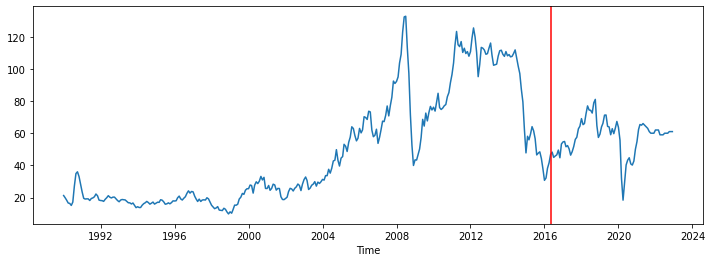

In [13]:
# отрисуем временные ряды
plt.figure(figsize=(12, 4))
plt.plot(ts2.date, ts2.brent)
plt.axvline(x = ts2.date[int(len(ts2) * 0.8)], color = 'red')
plt.xlabel('Time')
plt.show()

In [14]:
ts1.head()

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


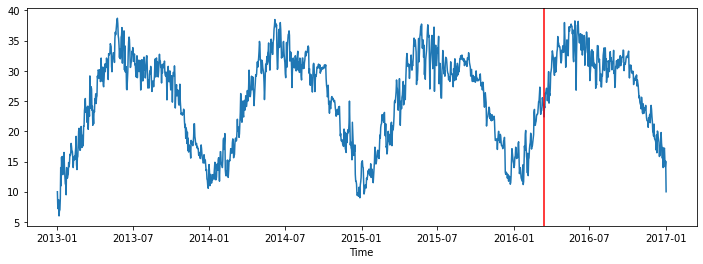

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(ts1.date, ts1.meantemp)
plt.axvline(x = ts1.date[int(len(ts1) * 0.8)], color = 'red')
plt.xlabel('Time')
plt.show()

<BarContainer object of 1462 artists>

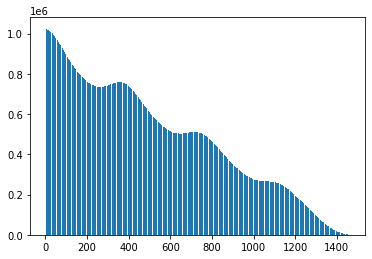

In [16]:
# посчитайте и нарисуйте график автокорреляционной функции
# hint, используйте для этого np.correlate(..., mode='full')
#https://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
ts1_autocorr = np.correlate(ts1['meantemp'], ts1['meantemp'], mode = 'full')
plt.bar(range(0, len(ts1_autocorr[ts1_autocorr.size // 2:])), ts1_autocorr[ts1_autocorr.size // 2:])

In [17]:
ts2.head()

,date,brent
date,,
1990-01,1990-01-01,21.251
1990-02,1990-02-01,19.813
1990-03,1990-03-01,18.387
1990-04,1990-04-01,16.612
1990-05,1990-05-01,16.352


<BarContainer object of 396 artists>

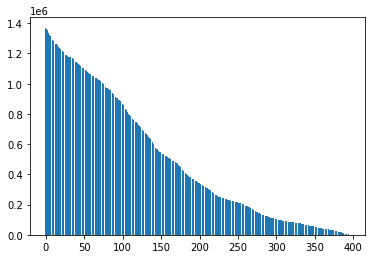

In [18]:
ts2_autocorr = np.correlate(ts2['brent'], ts2['brent'], mode = 'full')
plt.bar(range(0, len(ts2_autocorr[ts2_autocorr.size // 2:])), ts2_autocorr[ts2_autocorr.size // 2:])

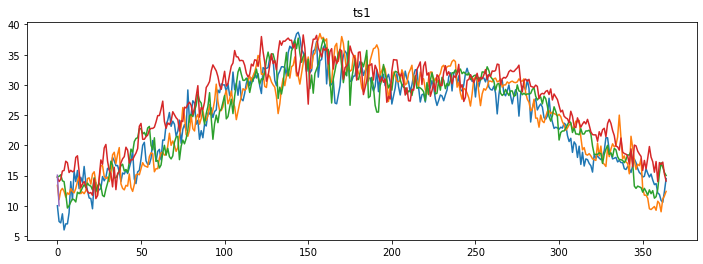

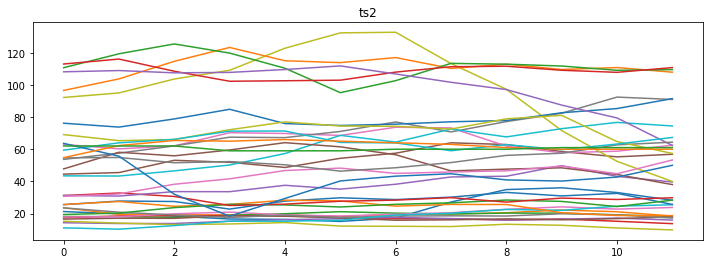

In [19]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными
def season_split(ts, season = 365, data_col = 'meantemp', title = 'ts1'):
    plt.figure(figsize=(12, 4))
    plt.title(title)
    for i in range(0, len(ts), season):
        plt.plot(ts[i:i+season][data_col].values)
    
    plt.show()

season_split(ts1, season = 365, title = 'ts1')
season_split(ts2, season = 12, data_col = 'brent', title = 'ts2')

## Задание 3. Предсказание месячного временного ряда (4.5 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.


### NaiveForecaster из sktime (0.5 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [20]:
# change format for sktime
from sktime.forecasting.base import ForecastingHorizon
train_ts2 = pd.Series(data=ts2_train['brent'].values, index=ts2_train.index)
test_ts2 = pd.Series(data=ts2_test['brent'].values, index=ts2_test.index)
fh = ForecastingHorizon(test_ts2.index, is_relative=False)

In [21]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
naiveforecaster = NaiveForecaster()
naiveforecaster.fit(train_ts2)

NaiveForecaster()

In [22]:
# посчитайте метрики на test
from sklearn.metrics import mean_absolute_error
y_pred = naiveforecaster.predict(fh)
mean_absolute_error(ts2_test.brent, y_pred)

13.649645569620258

### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [23]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
sarima = ARIMA(order = (1, 1, 1), seasonal_order = (1, 0, 0, 12))
sarima.fit(train_ts2)
autoarima = AutoARIMA()
autoarima.fit(train_ts2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AutoARIMA()

In [24]:
# посчитайте метрики на test
y_pred_sarima = sarima.predict(fh)
y_pred_auto = autoarima.predict(fh)
print('SARIMA:')
print(mean_absolute_error(ts2_test.brent, y_pred_sarima))
print('AutoARIMA:')
print(mean_absolute_error(ts2_test.brent, y_pred_auto))

SARIMA:
10.469979456061747
AutoARIMA:
11.58453986739932


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [25]:
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull

# ваш код обучения моделей здесь
dlt = DLTFull(
    response_col='brent', 
    date_col='date',
    regressor_col=[],
    seasonality=52,
)

# обучаем модель
dlt.fit(df=ts2_train)

# делаем прогноз
predicted_df_dlt = dlt.predict(df=ts2_test)

# выводим таблицу прогноза
predicted_df_dlt.head()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


,date,prediction_5,prediction,prediction_95
0,2016-06-01,42.211958,49.730991,55.306778
1,2016-07-01,42.163750,52.425360,63.871677
2,2016-08-01,40.001680,54.587018,71.592630
3,2016-09-01,34.515271,57.763149,77.315604
4,2016-10-01,33.865257,58.779713,84.902738


In [26]:
# посчитайте метрики на test
print('DLT:')
print(mean_absolute_error(ts2_test.brent, predicted_df_dlt.prediction))

DLT:
9.097453920567101


In [27]:
lgt = LGTFull(
    response_col='brent', 
    date_col='date',
    regressor_col=[],
    seasonality=52,
)

# обучаем модель
lgt.fit(df=ts2_train)

# делаем прогноз
predicted_df = lgt.predict(df=ts2_test)

# выводим таблицу прогноза
predicted_df.head()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


,date,prediction_5,prediction,prediction_95
0,2016-06-01,42.613302,48.759112,53.641552
1,2016-07-01,39.564528,50.596035,60.807147
2,2016-08-01,30.604676,51.652556,68.162050
3,2016-09-01,30.488746,54.114587,72.427532
4,2016-10-01,28.786556,53.416259,78.601545


In [28]:
print('LGT:')
print(mean_absolute_error(ts2_test.brent, predicted_df.prediction))

LGT:
16.52356018993367


### ETS (2 балла).

Обучите из библиотеки `sklearn` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [29]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS
ets = ExponentialSmoothing(trend = 'add', seasonal='add')
ets.fit(train_ts2)
auto_ets = AutoETS()
auto_ets.fit(train_ts2)

AutoETS()

In [30]:
# посчитайте метрики на test
y_pred_ets = ets.predict(fh)
y_pred_autoets = auto_ets.predict(fh)
print('ETS:')
print(mean_absolute_error(ts2_test.brent, y_pred_ets))
print('AutoETS:')
print(mean_absolute_error(ts2_test.brent, y_pred_autoets))

ETS:
12.777865049853888
AutoETS:
13.6499786407663


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

In [31]:
y_pred_ets

date
2016-06    46.954054
2016-07    47.871312
2016-08    47.986949
2016-09    47.565115
2016-10    46.462312
             ...    
2022-08    52.859379
2022-09    52.437546
2022-10    51.334743
2022-11    49.914666
2022-12    48.203236
Freq: M, Length: 79, dtype: float64

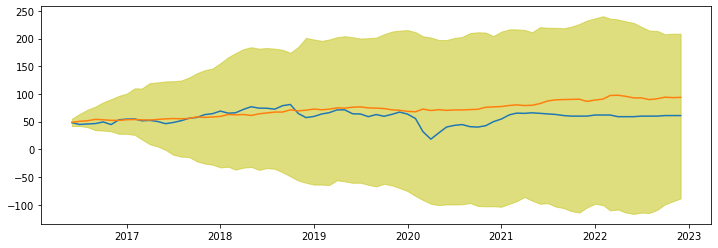

In [34]:
# нарисуйте пресказания
plt.figure(figsize = (12, 4))
plt.plot(ts2_test.date, ts2_test.brent)
plt.plot(predicted_df.date, predicted_df.prediction)
plt.fill_between(predicted_df_dlt.date, predicted_df_dlt.prediction_5, predicted_df_dlt.prediction_95, color='y', alpha=.5)

## Задание 4. Предсказание дневного временного ряда (2.5 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (0.5 балла).

*   List item
*   List item



Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [35]:
train_ts1 = pd.Series(data=ts1_train['meantemp'].values, index=ts1_train.index)
test_ts1 = pd.Series(data=ts1_test['meantemp'].values, index=ts1_test.index)
fh = ForecastingHorizon(test_ts1.index, is_relative=False)

In [36]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
naiveforecaster = NaiveForecaster()
naiveforecaster.fit(train_ts1)

NaiveForecaster()

In [38]:
# посчитайте метрики на test
y_pred = naiveforecaster.predict(fh)
mean_absolute_error(ts1_test.meantemp, y_pred)

6.893501274618636

### KTR из orbit (1 балл).



In [39]:
ts1_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [42]:
from orbit.models.ktrlite import KTRLiteMAP

# ваш код обучения моделей здесь
ktr = KTRLiteMAP(
    response_col='meantemp', 
    date_col='date',
    seasonality=[7, 365.25],
)

# обучаем модель
ktr.fit(df=ts1_train)

# делаем прогноз
predicted_df_ktr = ktr.predict(df=ts1_test)

# выводим таблицу прогноза
predicted_df_ktr.head()

,date,prediction_5,prediction,prediction_95
0,2016-03-16,21.773136,25.444126,29.089791
1,2016-03-17,22.078201,25.628665,29.200899
2,2016-03-18,22.208589,25.775256,29.368603
3,2016-03-19,22.295974,25.904140,29.532708
4,2016-03-20,22.604903,26.126908,29.711486


In [43]:
# посчитайте метрики на test
print('KTR:')
print(mean_absolute_error(ts1_test.meantemp, predicted_df_ktr.prediction))

KTR:
1.6392208647056816


### Phophet (1 балл).



In [44]:
ts1.head()

,date,meantemp,humidity,wind_speed,meanpressure
date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [47]:
from prophet import Prophet

# ваш код обучения моделей здесь
train_df_prophet = ts1_train[['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure']]
train_df_prophet.columns = ['ds', 'y', 'humidity', 'wind_speed', 'meanpressure']
model = Prophet(interval_width=0.9)

# добавляем регрессоры
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('meanpressure')

# обучаем модель
model.fit(train_df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
# посчитайте метрики на test
future = ts1_test[['date', 'humidity', 'wind_speed', 'meanpressure']]
future.columns = ['ds', 'humidity', 'wind_speed', 'meanpressure']
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
print('Orbit:')
print(mean_absolute_error(ts1_test.meantemp, forecast.yhat))

Orbit:
11.221639190863858


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

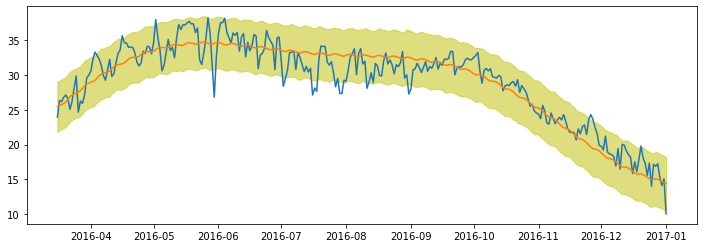

In [53]:
# нарисуйте пресказания
plt.figure(figsize = (12, 4))
plt.plot(ts1_test.date, ts1_test.meantemp)
plt.plot(predicted_df_ktr.date, predicted_df_ktr.prediction)
plt.fill_between(predicted_df_ktr.date, predicted_df_ktr.prediction_5, predicted_df_ktr.prediction_95, color='y', alpha=.5)

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытай свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной на тестовой выборке с помощью MAE. 



In [ ]:
# ваш код модели на STAN и её обучения моделей здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте пресказания